# PROJECT OVERVIEW

* Multi-Agentic Stock Analysis Assistant with LangGraph A multi-agent system that autonomously gathers and analyzes stock performance data for Fortune 500 companies, using LangGraph for advanced agent orchestration.

🎯 Project Objective The goal of this project is to design and build a multi-agent system that automates the collection, processing, and visualization of information and stock performance data on Fortune 500 companies. The system leverages LangGraph’s agentic orchestration to create intelligent agents capable of collaborating and conditionally executing tools for efficient data gathering and insightful analysis.

🛠️ Tools and Technologies LangGraph Core Tools – Build and orchestrate agentic workflows.

Wikipedia API – Retrieve factual information on companies.

Python – Implement agents and integrate tools.

Git/GitHub – Version control

Features ✅ Built multiple agents using LangGraph’s agentic framework.

✅ Implemented agent orchestration with conditional tool calls for adaptive behavior.

✅ Developed one-line agents for lightweight tasks and supervisor agents for complex coordination.

✅ Integrated Wikipedia API to automatically gather company information.

✅ Designed and generated insightful visualizations of stock performance data.

✅ Enabled flexible and modular agent workflows with LangGraph.

COnfiguration of Environment : Installing the dependencies & Libraries 

In [7]:
!pip install --quiet wikipedia==1.4.0
!pip install langchain-core==0.3.59 langgraph==0.4.3 
!pip install langchain-openai==0.3.16
!pip install langchain-experimental==0.3.4 
!pip install  langgraph-supervisor==0.0.21

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Building your agent's toolbox
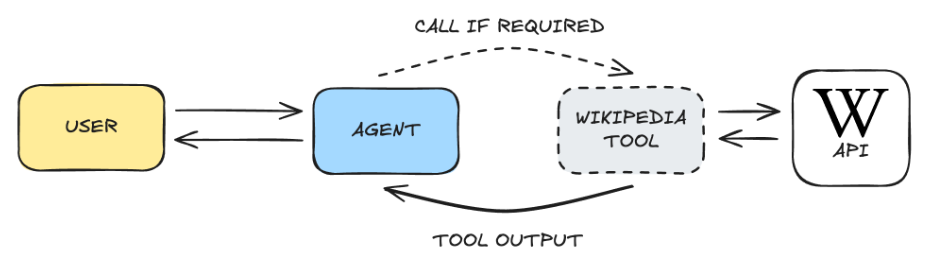
* Agents use tools to trigger certain actions that could be used in executing some code, retrieving a local file, running a web search, or performing a math calculation.

* The aim of this project is to build an agentic tool that can compile financial information, including summaries, stock performance data, and accompanying visualizations of Fortune 500 companies.

* I will start with a single-agent implementation to kickstart the LangGraph syntax and after which i create the tools for the multi-agent case.

* In total, there are three tools required:

*A tool for retrieving company information from the internet → Wikipedia
* A tool for retrieving stock performance information from a local CSV file
* A tool for running Python code to generate the visualizations
* Each tool should return its tool output, as well as an instruction for the LLM to return FINAL ANSWER if the task has been completed:

 # Tool 1: Wikipedia search
* I used the wikipedia Python library to perform Wikipedia searches and return informative summaries about different companies. This tool calls Wikipedia's API in the backend, which doesn't require an API key.

* This library has two functions that we'll use to search and summarize the company information:

wikipedia.search(): Search Wikipedia to return the highest-ranking page titles
wikipedia.summary(): Fetch a summary from a given page. The sentences argument can be used to control the amount of information (number of sentences) returned.

In [9]:
from typing import Annotated
import wikipedia
from langchain_core.tools import tool 

@tool # this makes the function a callable langchain tool
def wikipedia_tool( query : Annotated [str, " The wikipedia search to execute to find key summary information"],):
    """Use this to search wikipedia for factual information"""
    # Step 1 : Search using query 
    results =




In [18]:
from typing import Annotated
import wikipedia
from langchain_core.tools import tool

@tool
def wikipedia_tool(query: Annotated[str, "The wikipedia search to excute to find key summary information."]):
    """Use this to search wikipedia for factual information"""
    #step 1 search using query 
    try:
        results = wikipedia.search(query)

        if not results:
            return "No results found on wikipedia"
    #step 2 Retrieve page title 
        title = results[0]
    # Feth summary 
        summary = wikipedia.summary(title, sentences = 8, auto_suggest = False, redirect = True)
    except BaseException as e:
        return f"Failed to execute . Error: {repr(e)}"

    return_result = f"Successfully excuted : \n Wikipedia: {summary}"

    return ( return_result + "\n\n If you have completed all task respond with FINAL ANSWER")


In [20]:
# Test langchain tool using a query 

company_name = "Apple Inc."
wiki_summary = wikipedia_tool.invoke(f"{company_name}")
print(wiki_summary)

Successfully excuted : 
 Wikipedia: Apple Inc. is an American multinational corporation and technology company headquartered in Cupertino, California, in Silicon Valley. It is best known for its consumer electronics, software, and services. Founded in 1976 as Apple Computer Company by Steve Jobs, Steve Wozniak and Ronald Wayne, the company was incorporated by Jobs and Wozniak as Apple Computer, Inc. the following year. It was renamed Apple Inc. in 2007 as the company had expanded its focus from computers to consumer electronics. Apple is the largest technology company by revenue, with US$391.04 billion in the 2024 fiscal year.

 If you have completed all task respond with FINAL ANSWER


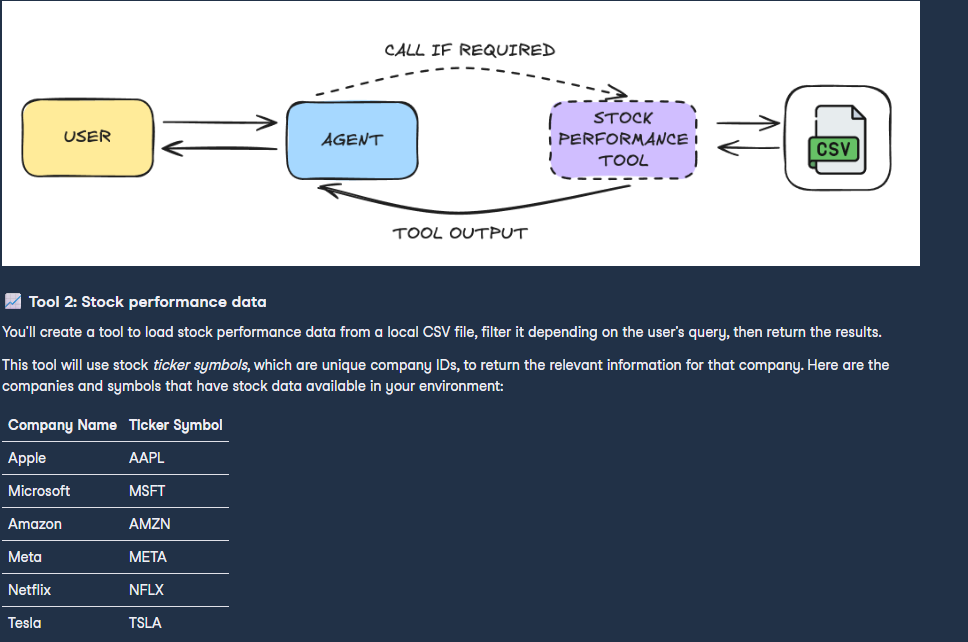
### 📈 Tool 2: Stock performance data

I created a stock_data_tool to load stock performance data from a local CSV file and filter it depending on the user's query, then return the results.

This tool will use stock _ticker symbols_, which are unique company IDs, to return the relevant information for that company. Here are the companies and symbols that have stock data available in your environment:

| Company Name | Ticker Symbol |
|--------------|---------------|
| Apple        | AAPL          |
| Microsoft    | MSFT          |
| Amazon       | AMZN          |
| Meta         | META          |
| Netflix      | NFLX          |
| Tesla        | TSLA          |

Note This tool can be adapted  to pull real-time data from an API like Yahoo Finance, rather than the CSVs.